In [4]:
import pandas as pd
import os.path
import numpy as np
import travel_matrix as tmx
import store_n_load as snl
import time
import plotly.express as px
import seaborn as sns

In [5]:
def read_data(nrows):
    abs_path = os.path.abspath('travel_matrix.py')
    directory = os.path.dirname(abs_path)
    save_path = directory
    file_name = 'example_data'
    extension = '.xlsx'
    complete_path = os.path.join(save_path, file_name+extension)
    xfile = pd.ExcelFile(complete_path)
    activity_data = pd.read_excel(xfile, 'activity_data', nrows=nrows)
    return activity_data

In [6]:
df = read_data(nrows=None)
print(df.head())
size = df.shape[0]
print(size)
lat = df.latitude
lon = df.longitude

   activity_id  client_nr shift_code  shift_id  duration  tw_start  tw_end  \
0            1    2000140  AVP1-2233         0         5       NaN     NaN   
1            2     705026  AVP1-2233         0         5       NaN     NaN   
2            3     705026  AVP1-2233         0        10       NaN     NaN   
3            4     811647  AVP1-2233         0        10       NaN     NaN   
4            5     819573  AVP1-2233         0        15       NaN     NaN   

   tw_bool activity_level_name  activity_level   latitude  longitude  
0        0               PV 2+               2  52.269695   6.164124  
1        0                PV 3               3  52.267812   6.175048  
2        0               PV 2+               2  52.266598   6.168108  
3        0               PV 2+               2  52.269764   6.176036  
4        0               PV 2+               2  52.267690   6.166916  
87


In [7]:
path = None
tic = time.perf_counter()
tm_osrm = tmx.travel_matrix(size, lat, lon, path)
toc = time.perf_counter()
print(f'Calculated travel matrix in {toc - tic:0.4f} seconds')
print(tm_osrm[0])
print(tm_osrm.__class__.__name__)
fn = "travel_matrix_osrm"
sp = os.path.abspath(os.getcwd())
snl.store(tm_osrm, fn, sp)

computing travel times...
using osrm


KeyboardInterrupt: 

In [8]:
path = "deventer_graph_s.graphml"
tic = time.perf_counter()
tm_osmnx = tmx.travel_matrix(size, lat, lon, path)
toc = time.perf_counter()
print(f'Calculated travel matrix in {toc - tic:0.4f} seconds')
print(tm_osmnx[0])
print(tm_osmnx.__class__.__name__)
fn = "travel_matrix_osmnx"
sp = os.path.abspath(os.getcwd())
snl.store(tm_osmnx, fn, sp)

computing travel times...
using osmnx
computation finished
Calculated travel matrix in 123.3052 seconds
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
list


In [ ]:
m1, m2, d, f, n = tmx.matrix_dev(tm_osrm, tm_osmnx)
print(f'Norm={n},\nRelDiff={f}')

Norm=7399.757390516868,
RelDiff=[[        nan         nan         nan ...         nan         nan
          nan]
 [        nan         nan  1.3213308  ...  1.56318355  1.23813198
   0.64688161]
 [        nan  1.29698507         nan ...  2.84207388 17.61048834
   1.10331613]
 ...
 [        nan  1.57179814  2.84207388 ...         nan  0.93659493
   1.31593845]
 [        nan  1.24131827 17.61048834 ...  0.93659493         nan
   1.03612689]
 [        nan  0.70092383  1.10152447 ...  1.3135988   1.03388449
          nan]]


/Users/witoldtenhove/Documents/Projects/vu/buur/hhcrsp-pGOMEA/test/travel_matrix.py:137: RuntimeWarning: divide by zero encountered in true_divide
  F = M1/M2
/Users/witoldtenhove/Documents/Projects/vu/buur/hhcrsp-pGOMEA/test/travel_matrix.py:137: RuntimeWarning: invalid value encountered in true_divide
  F = M1/M2


In [ ]:
relative_diff = np.matrix.flatten(f)
print(np.nanmean(relative_diff))

inf


In [ ]:
df = pd.DataFrame(relative_diff, columns=['Relative'])
fig = px.histogram(df, x="Relative", marginal="rug")
fig.show()

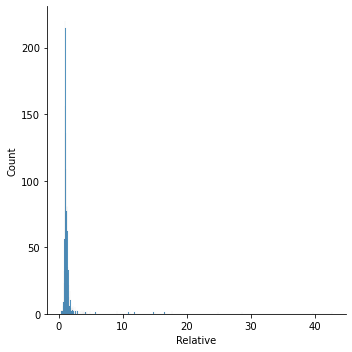

In [ ]:
sns.displot(df, x="Relative")

In [ ]:
path = "deventer_graph.graphml"
tic = time.perf_counter()
tm_osmnx = tmx.travel_matrix(size, lat, lon, path)
toc = time.perf_counter()
print(f'Calculated travel matrix in {toc - tic:0.4f} seconds')
print(tm_osmnx[0])
print(tm_osmnx.__class__.__name__)
fn = "travel_matrix_osmnx"
sp = os.path.abspath(os.getcwd())
snl.store(tm_osmnx, fn, sp)
mx_d = tmx.matrix_dev(tm_osrm, tm_osmnx)
m1, m2, d, f, n = tmx.matrix_dev(tm_osrm, tm_osmnx)
print(f'Norm={n},\nRelDiff={f}')


computing travel times...
using osmnx
computation finished
Calculated travel matrix in 135.9614 seconds
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
list
Norm=4272.706398933936,
RelDiff=[[       nan        nan        nan ...        nan        nan        nan]
 [       nan        nan 1.06886665 ... 1.31139576 1.09327998 1.09247885]
 [       nan 1.06977721        nan ... 0.98770548 1.04378673 1.02941589]
 ...
 [       nan 1.36145969 0.98770548 ...        nan 0.87348767 1.31593845]
 [       nan 1.11672849 1.04378673 ... 0.87348767        nan 1.05141327]
 [       nan 1.09247885 1.0277489  ... 1.3135988  1.04913676        nan]]


/Users/witoldtenhove/Documents/Projects/vu/buur/hhcrsp-pGOMEA/test/travel_matrix.py:137: RuntimeWarning:

divide by zero encountered in true_divide

/Users/witoldtenhove/Documents/Projects/vu/buur/hhcrsp-pGOMEA/test/travel_matrix.py:137: RuntimeWarning:

invalid value encountered in true_divide



In [ ]:
relative_diff = np.matrix.flatten(f)
np.nanmean(relative_diff)

inf

In [ ]:
df = pd.DataFrame(relative_diff, columns=['Relative'])
fig = px.histogram(df, x="Relative", marginal="rug")
fig.show()

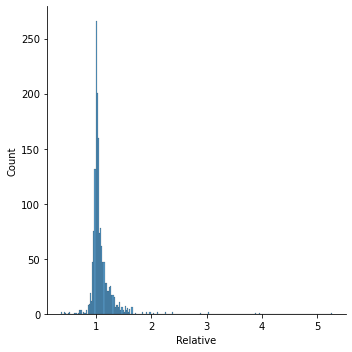

In [ ]:
sns.displot(df, x="Relative")